In [1]:
import os

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler

# Read Data

In [2]:
path_to_processed_df = "../data/processed/P01"

#Get list of csv files
data_paths = os.listdir(path_to_processed_df)

# Keep only csv data
data_paths = [x for x in data_paths if x.endswith(".csv")]
data_paths = [os.path.join(path_to_processed_df, x) for x in data_paths]
data_paths.sort()

In [3]:
def load_data_as_dataframe(data_paths: list[str]) -> list[pd.DataFrame]:
    """ Loads the .csv file into dataframes

    :return: list[pd.DataFrames]
    """
    data = []
    for path in data_paths:
        df = pd.read_csv(path)
        # Convert 'TS_UNIX' to datetime
        df["TS_UNIX"] = pd.to_datetime(df["TS_UNIX"], format="%Y-%m-%d %H:%M:%S.%f")
        df = df.set_index("TS_UNIX", drop=True)
        data.append(df)

    return data

df_list = load_data_as_dataframe(data_paths)

# Processing

In [4]:
FEATURE_NAMES = list(df_list[0].columns)
df_list[0]

,EEG-L3-RW250,EEG-L5-RW250,EEG-C3-RW250,EEG-Cz-RW250,EEG-C4-RW250,EEG-R3-RW250,EEG-R5-RW250
TS_UNIX,,,,,,,
2022-06-20 16:52:00.482892032+02:00,2.627422,1.855009,4.020922,1.478189,4.339555,1.561284,3.142269
2022-06-20 16:52:00.482905088+02:00,2.444575,1.693927,3.758652,1.222329,3.966451,1.328616,2.830244
2022-06-20 16:52:00.482917888+02:00,2.270200,1.542644,3.514562,1.027031,3.598714,1.113825,2.546634
2022-06-20 16:52:00.482929920+02:00,2.121425,1.408440,3.302235,0.889588,3.246621,0.916807,2.312470
2022-06-20 16:52:00.482949888+02:00,2.007978,1.297264,3.125684,0.797827,2.916363,0.738571,2.134958
...,...,...,...,...,...,...,...
2022-06-20 16:53:27.914141952+02:00,0.532971,0.538213,0.037965,0.951213,-0.198071,0.973324,-0.842514
2022-06-20 16:53:27.914152960+02:00,0.548611,0.574675,0.023627,0.939592,-0.234455,0.972067,-0.744485
2022-06-20 16:53:27.914163968+02:00,0.564981,0.606522,-0.000629,0.910126,-0.286229,0.969688,-0.639527


In [5]:
df_scaled_list = []

for df in df_list:
    scaler = MinMaxScaler()
    df_scaled = pd.DataFrame(scaler.fit_transform(df), index=df.index, columns=df.columns)
    df_scaled_list.append(df_scaled)

In [6]:
df_scaled_list[0].describe()

,EEG-L3-RW250,EEG-L5-RW250,EEG-C3-RW250,EEG-Cz-RW250,EEG-C4-RW250,EEG-R3-RW250,EEG-R5-RW250
count,10990.000000,10990.000000,10990.000000,10990.000000,10990.000000,10990.000000,10990.000000
mean,0.498897,0.568642,0.538752,0.560380,0.521214,0.575447,0.575367
std,0.074067,0.105546,0.104231,0.108272,0.112641,0.109296,0.107549
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.483348,0.546228,0.501817,0.527163,0.484041,0.547491,0.535497
50%,0.501737,0.576657,0.540619,0.567326,0.522486,0.582995,0.583697
75%,0.523226,0.605433,0.576856,0.607301,0.567517,0.616185,0.625451
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## Reshape to LSTM format

In [7]:
# Validation Set
df_scaled_list_val = df_scaled_list[:2]
df_scaled_list = df_scaled_list[len(df_scaled_list_val):]

In [8]:
def stack_to_3d(df_list: list[pd.DataFrame]) -> np.array:

    sequence_length = df_list[0].shape[0]

    # Convert DataFrames to numpy arrays and reshape them
    reshaped_data = []
    for df in df_list:
        # Convert DataFrame to numpy array
        data_array = df.values  # Assuming your DataFrame is named 'df'

        # Calculate the number of sequences that can be extracted
        num_sequences = len(data_array) - sequence_length + 1

        # Extract sequences of length 'sequence_length'
        for i in range(num_sequences):
            sequence = data_array[i:i + sequence_length]
            reshaped_data.append(sequence)

    # Convert reshaped_data to a numpy array
    reshaped_data = np.array(reshaped_data)
    return reshaped_data

reshaped_data = stack_to_3d(df_scaled_list)
reshaped_data_val = stack_to_3d(df_scaled_list_val)

# Check the shape of the reshaped data
print(reshaped_data.shape)
print(reshaped_data_val.shape)

(8, 10990, 7)
(2, 10990, 7)


# Modelling

In [9]:
import tensorflow as tf

from tensorflow.keras.layers import Input, LSTM, RepeatVector, Dense, Bidirectional, TimeDistributed, Reshape


# Hyperparams
sequence_length = df_scaled_list[0].shape[0]
latent_dims = 2
num_features = df_scaled_list[0].shape[1]

# Sampling layer
class Sampling(tf.keras.layers.Layer):
    def call(self, args):
        z_mean, z_log_var = args
        batch = tf.shape(z_mean)[0]
        dim = tf.shape(z_mean)[1]
        epsilon = tf.keras.backend.random_normal(shape=(batch, dim))
        return z_mean + tf.exp(0.5 * z_log_var) * epsilon

# Encoder Architecture
inputs = Input(shape=(sequence_length, num_features))
z = LSTM(128)(inputs)
z_mean = Dense(latent_dims, activation="tanh")(z)
z_log_var = Dense(latent_dims, activation="tanh")(z)
codings = Sampling()([z_mean, z_log_var])
encoder = tf.keras.Model(inputs=[inputs], outputs = [z_mean, z_log_var, codings], name="encoder")

# Decoder Architecture
decoder_inputs = Input(shape=(latent_dims,))
x = Dense(1024)(decoder_inputs)
x = Dense(sequence_length * 1, name='Decode_1')(x)
x = Reshape((sequence_length, 1), name='Decode_2')(x)
x = LSTM(num_features, activation='tanh', return_sequences=True)(x)
x = TimeDistributed(Dense(num_features, activation='linear'), name='Decoder_Output_Layer')(x)
decoder = tf.keras.Model(inputs=decoder_inputs, outputs=x, name="decoder")

# Connecting Encoder + Decoder
_, _, codings = encoder(inputs)
reconstructions = decoder(codings)
vae = tf.keras.Model(inputs=[inputs], outputs=[reconstructions])

# Latent Loss
latent_loss = -0.5 * tf.keras.backend.sum(
                1 + z_mean - tf.keras.backend.exp(z_log_var) - tf.keras.backend.square(z_mean),
            axis=-1)
vae.add_loss(tf.keras.backend.mean(latent_loss) / sequence_length)

# Compile VAE
vae.compile(loss="mse", optimizer="adam")

2023-12-06 17:41:29.492034: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [10]:
encoder.summary()

Model: "encoder"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 10990, 7)]           0         []                            
                                                                                                  
 lstm (LSTM)                 (None, 128)                  69632     ['input_1[0][0]']             
                                                                                                  
 dense (Dense)               (None, 2)                    258       ['lstm[0][0]']                
                                                                                                  
 dense_1 (Dense)             (None, 2)                    258       ['lstm[0][0]']                
                                                                                            

In [11]:
decoder.summary()

Model: "decoder"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 2)]               0         
                                                                 
 dense_2 (Dense)             (None, 1024)              3072      
                                                                 
 Decode_1 (Dense)            (None, 10990)             11264750  
                                                                 
 Decode_2 (Reshape)          (None, 10990, 1)          0         
                                                                 
 lstm_1 (LSTM)               (None, 10990, 7)          252       
                                                                 
 Decoder_Output_Layer (Time  (None, 10990, 7)          56        
 Distributed)                                                    
                                                           

In [12]:
history = vae.fit(reshaped_data, reshaped_data, epochs=32, batch_size=2, validation_data=(reshaped_data_val, reshaped_data_val))

Epoch 1/32
4/4 [==============================] - 53s 12s/step - loss: 0.2565 - val_loss: 0.2717
Epoch 2/32
4/4 [==============================] - 47s 12s/step - loss: 0.2469 - val_loss: 0.2614
Epoch 3/32
4/4 [==============================] - 47s 12s/step - loss: 0.2318 - val_loss: 0.2329
Epoch 4/32
4/4 [==============================] - 47s 12s/step - loss: 0.2003 - val_loss: 0.2139
Epoch 5/32
4/4 [==============================] - 47s 12s/step - loss: 0.1634 - val_loss: 0.1471
Epoch 6/32
4/4 [==============================] - 47s 12s/step - loss: 0.1272 - val_loss: 0.1811
Epoch 7/32
4/4 [==============================] - 47s 12s/step - loss: 0.1297 - val_loss: 0.1246
Epoch 8/32
4/4 [==============================] - 47s 12s/step - loss: 0.1063 - val_loss: 0.1287
Epoch 9/32
4/4 [==============================] - 47s 12s/step - loss: 0.0952 - val_loss: 0.1109
Epoch 10/32
4/4 [==============================] - 46s 12s/step - loss: 0.0916 - val_loss: 0.0995
Epoch 11/32
4/4 [============

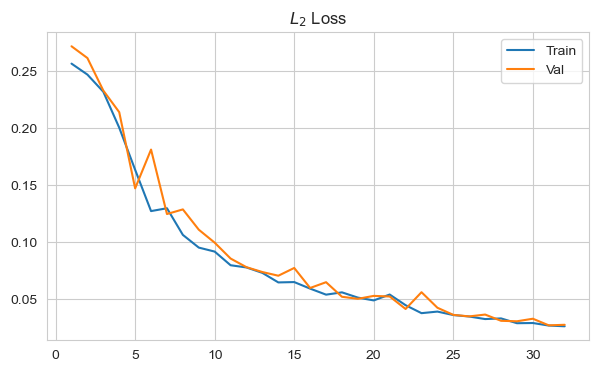

In [13]:
def plot_history(history):
    loss_dict = history.history

    loss_train = loss_dict["loss"]
    loss_val = loss_dict["val_loss"]
    x = [i+1 for i in range(0, len(loss_val))]

    plt.figure(figsize=(7, 4))
    plt.title("$L_2$ Loss")
    sns.lineplot(x=x, y=loss_train, label="Train")
    sns.lineplot(x=x, y=loss_val, label="Val")

plot_history(history)

# Synthesize

In [14]:
val_sample = np.expand_dims(reshaped_data_val[0], axis=0)#reshaped_data_val
print(val_sample.shape)

(1, 10990, 7)


In [15]:
val_sample_result = vae.predict(val_sample)

1/1 [==============================] - 2s 2s/step


In [16]:
val_sample_result[0]

array([[0.411982  , 0.2273831 , 0.24925861, ..., 0.29023683, 0.30440676,
        0.43686372],
       [0.5383197 , 0.34479347, 0.2615704 , ..., 0.40639508, 0.38112018,
        0.5113328 ],
       [0.57750106, 0.4084427 , 0.2531618 , ..., 0.4603213 , 0.40926498,
        0.5199212 ],
       ...,
       [0.5662693 , 0.43148157, 0.23077027, ..., 0.5183278 , 0.40788338,
        0.52314794],
       [0.56928945, 0.432703  , 0.23183885, ..., 0.52022326, 0.4088592 ,
        0.5259237 ],
       [0.5664736 , 0.4353207 , 0.22852749, ..., 0.5211844 , 0.4083671 ,
        0.5190901 ]], dtype=float32)

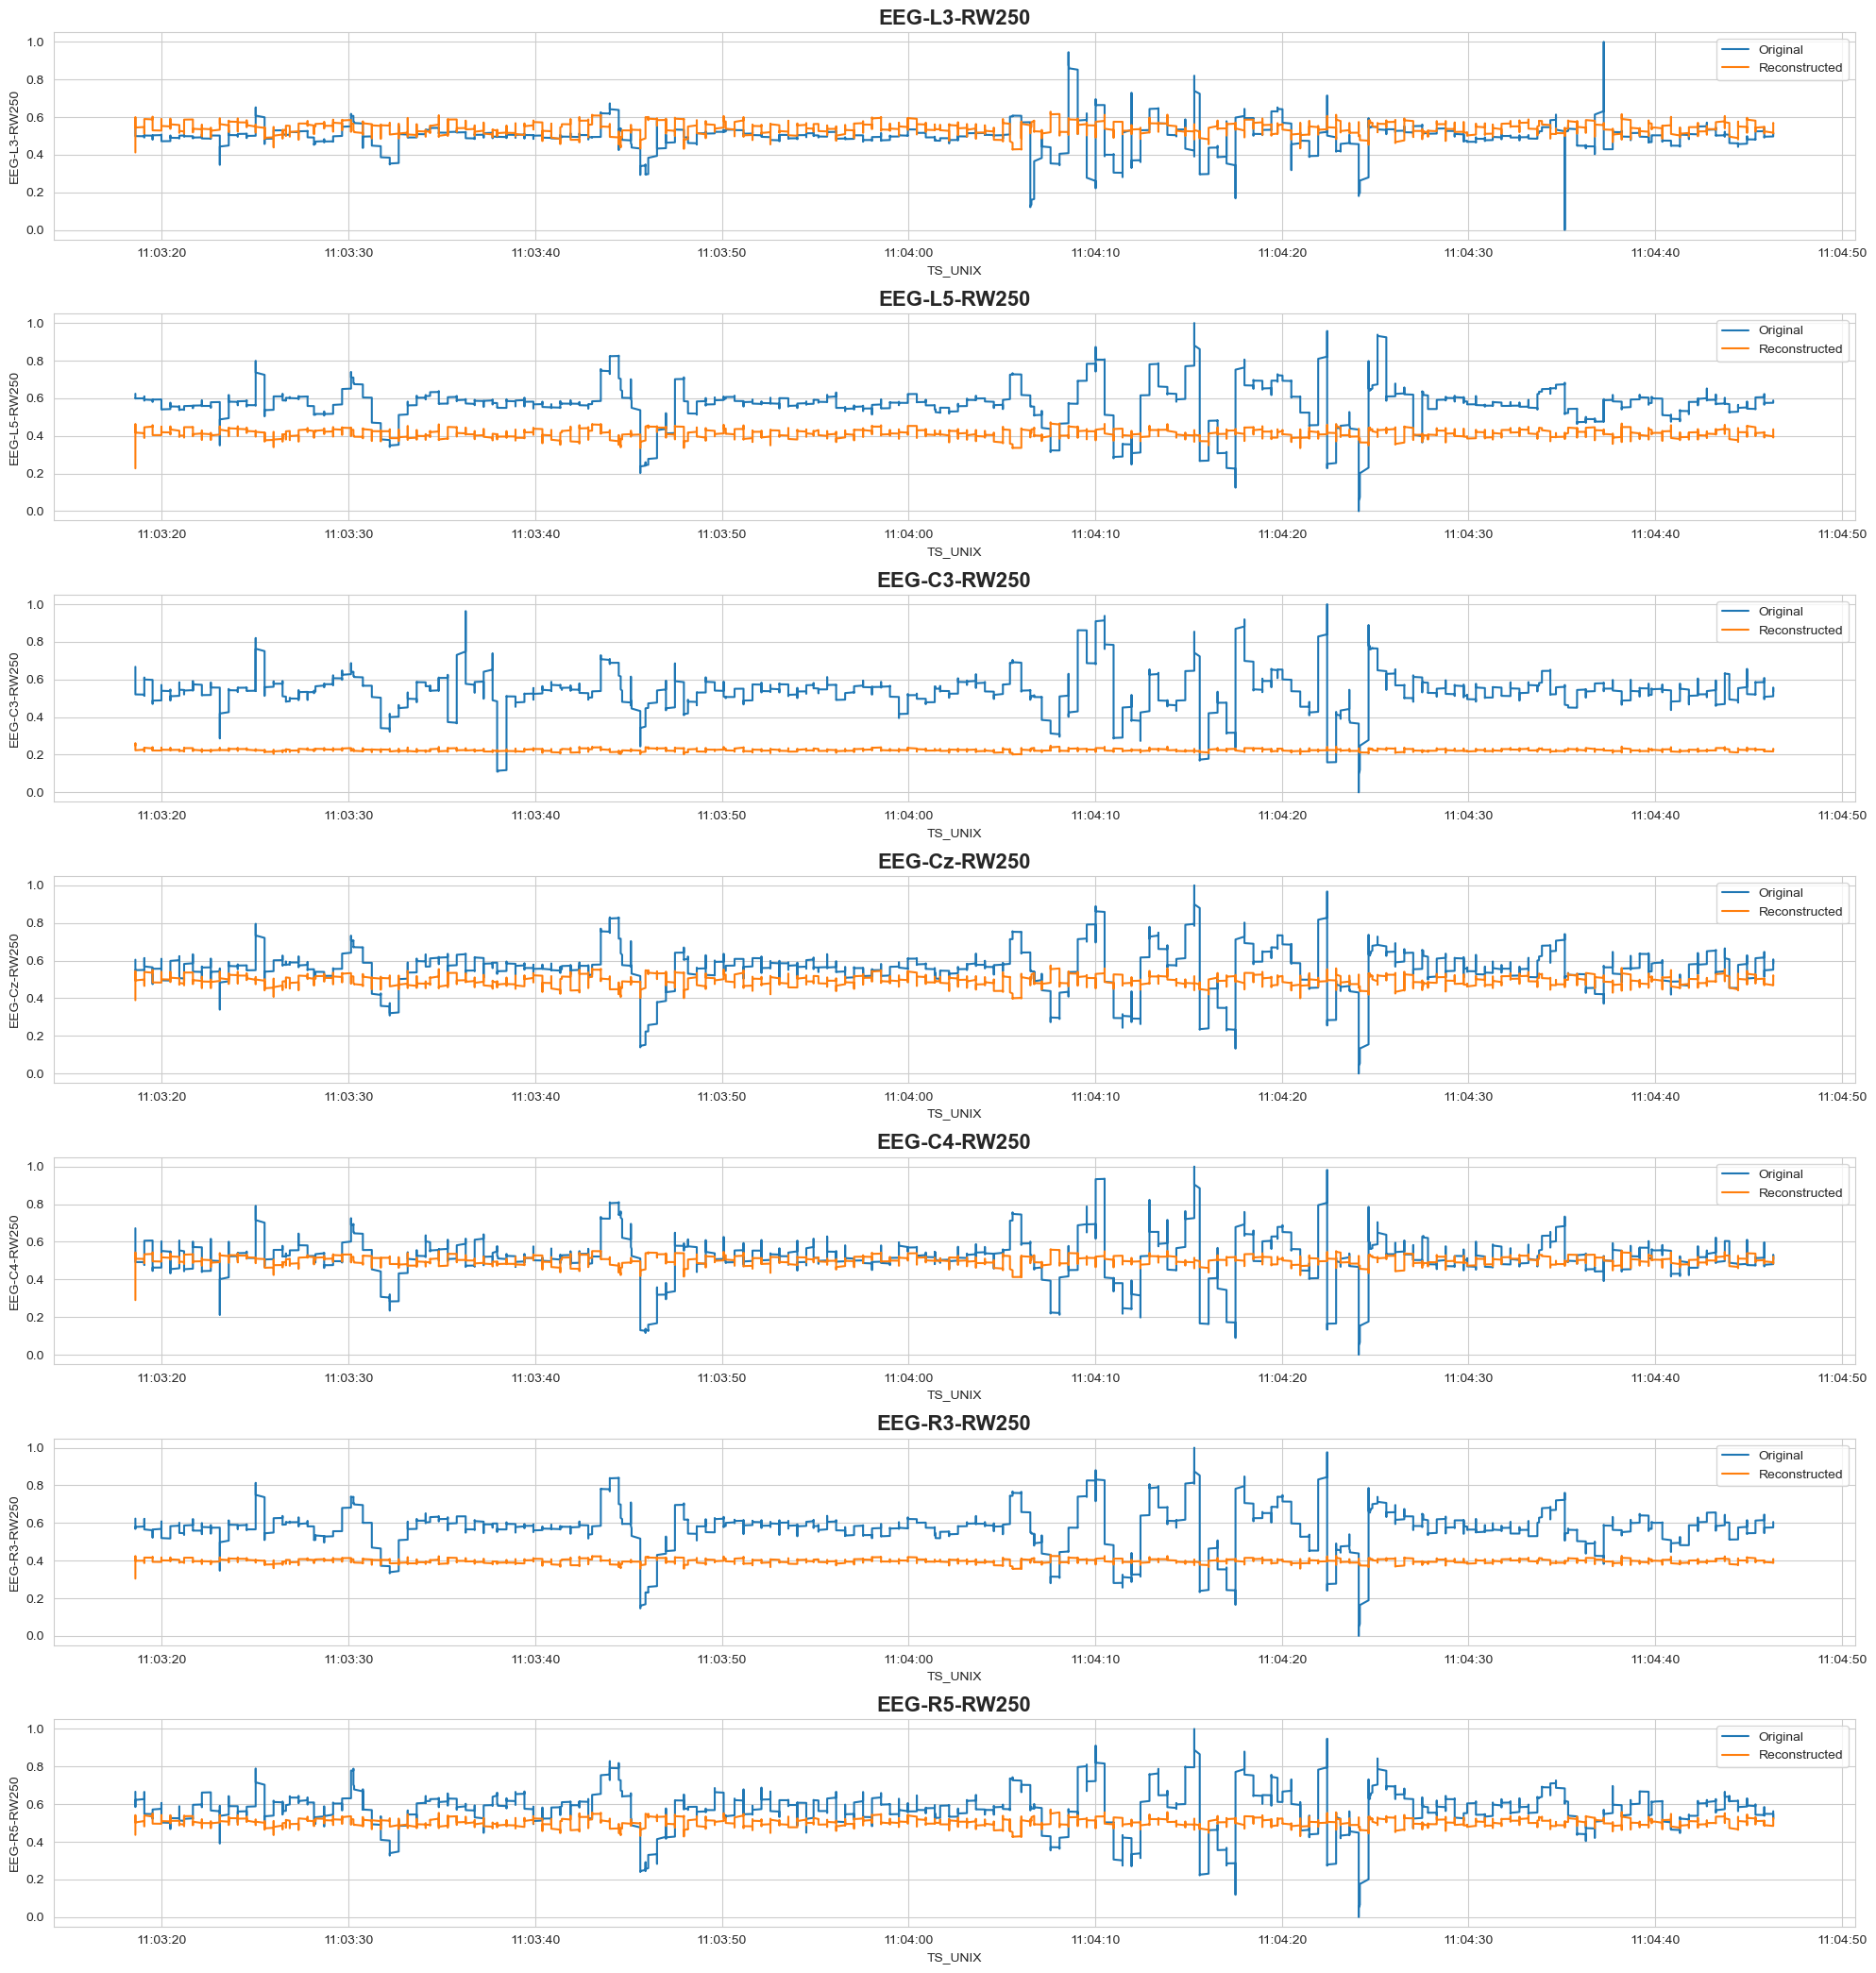

In [17]:
# Compare original and reconstruction
def compare_original_and_reconstruction(sample: np.array, sample_reconstructed: np.array) -> None:
    df_sample = pd.DataFrame(sample, columns=FEATURE_NAMES)
    df_reconstructed = pd.DataFrame(sample_reconstructed, columns=FEATURE_NAMES)

    fig, axes = plt.subplots(nrows=len(FEATURE_NAMES), ncols=1, figsize=(20, len(FEATURE_NAMES)*3))
    for col, ax in zip(FEATURE_NAMES, axes.flatten()):
        sns.lineplot(data=df_sample, x=df.index, y=col, ax=ax, label="Original")
        sns.lineplot(data=df_reconstructed, x=df.index, y=col, ax=ax, label="Reconstructed")
        ax.set_title(col, fontweight="bold", size=16)
    fig.tight_layout()


compare_original_and_reconstruction(val_sample[0], val_sample_result[0])

## Or generate complete new ones by sampling from latent space ...

In [18]:
# Generate synthetic data function using the decoder part of the VAE
def generate_time_series(num_samples, latent_dims):
    # Sample from the latent space
    latent_samples = np.random.normal(size=(num_samples, latent_dims))
    print(f"Latent Samples: {latent_samples}")
    # Generate synthetic data using the decoder model
    synthetic_data = decoder(latent_samples).numpy()
    return synthetic_data

# Generate synthetic time series data
num_samples = 1
synthetic_time_series = generate_time_series(num_samples, latent_dims)
print(synthetic_time_series.shape)

Latent Samples: [[-0.28850798 -0.38252939]]
(1, 10990, 7)


In [19]:
test = synthetic_time_series[0]
test.shape

(10990, 7)

In [20]:
test_df = pd.DataFrame(test, columns=df_scaled_list[0].columns)#, index=df_scaled_list[0].index)
test_df

,EEG-L3-RW250,EEG-L5-RW250,EEG-C3-RW250,EEG-Cz-RW250,EEG-C4-RW250,EEG-R3-RW250,EEG-R5-RW250
0,0.148113,0.191160,0.147940,0.183929,0.136589,0.186960,0.157453
1,0.229475,0.254505,0.156532,0.243241,0.202829,0.244561,0.217903
2,0.271016,0.282879,0.159624,0.269687,0.246116,0.277474,0.252465
3,0.292435,0.292746,0.161373,0.281788,0.273819,0.296275,0.274965
4,0.302392,0.292988,0.162570,0.286327,0.290713,0.306500,0.289711
...,...,...,...,...,...,...,...
10985,0.275586,0.242919,0.166835,0.263890,0.282622,0.291913,0.296783
10986,0.278109,0.244317,0.167510,0.266271,0.284598,0.293213,0.299275
10987,0.277852,0.244042,0.167293,0.265835,0.284998,0.293192,0.299179
10988,0.278803,0.244149,0.167658,0.266638,0.285909,0.293666,0.300366


## Visualize Synthetic Samples

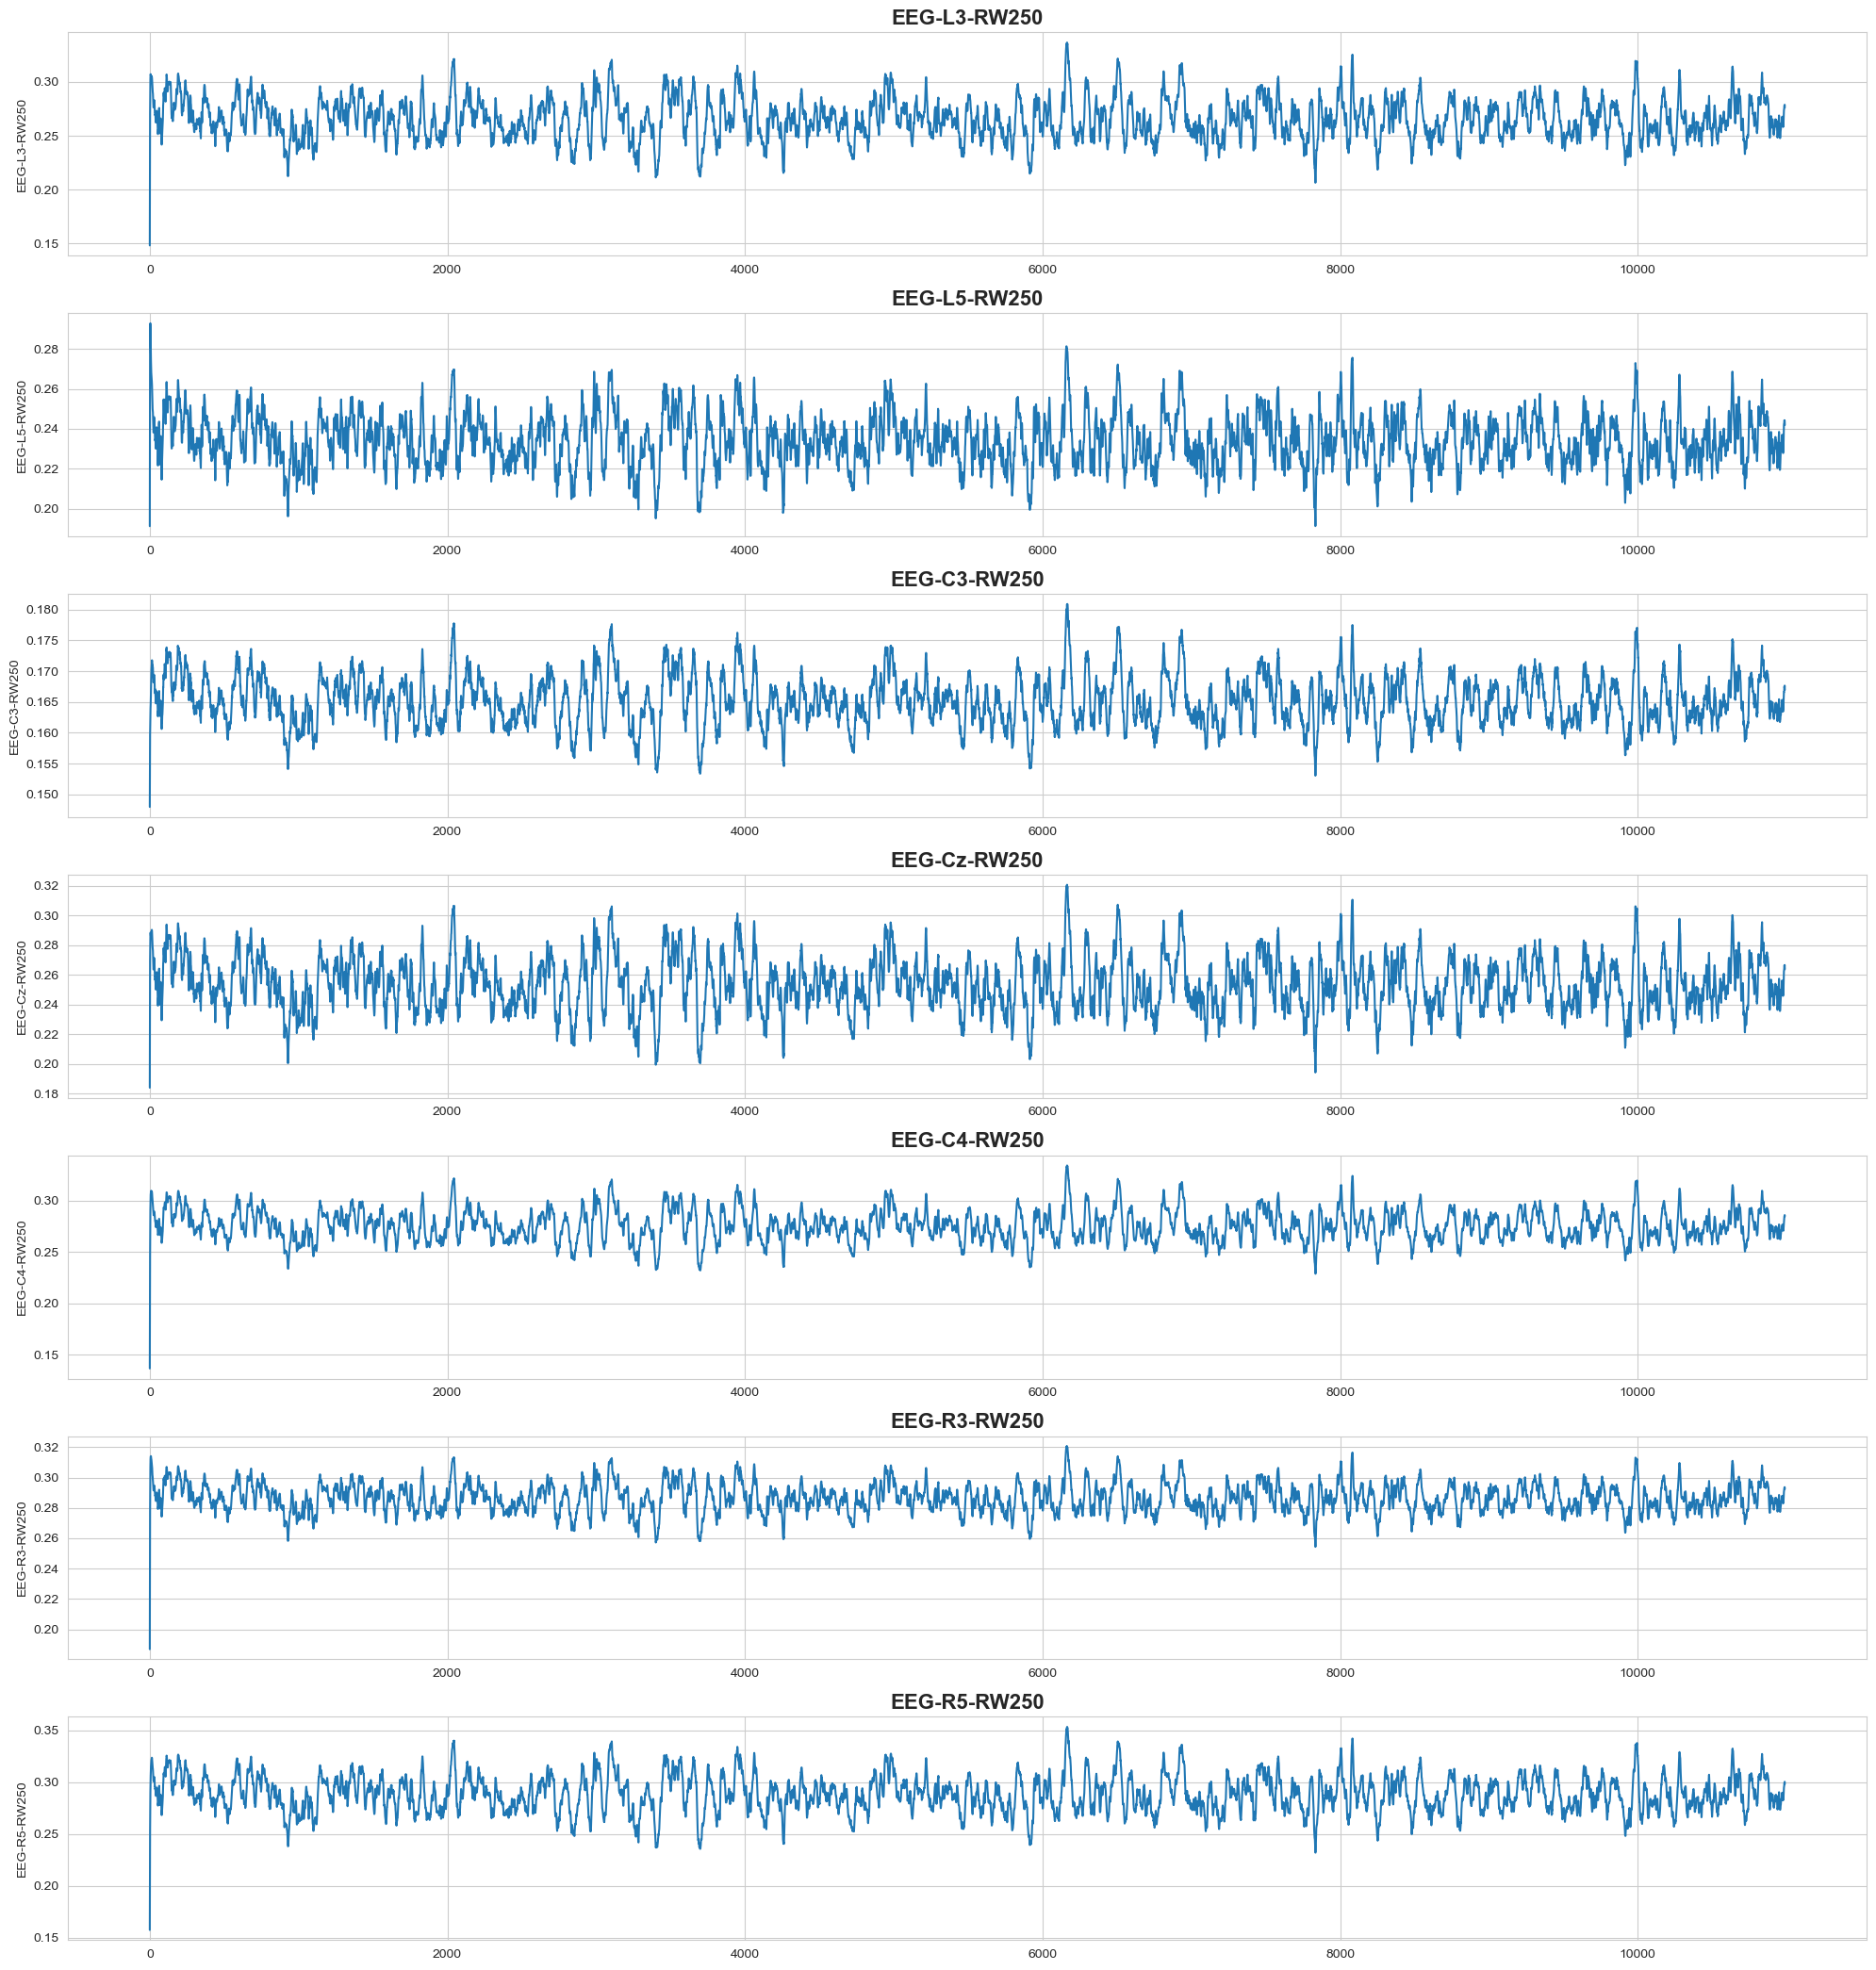

In [21]:
def plot_all_time_series(df: pd.DataFrame) -> None:
    """ Plots all Time Series (all float64 columns) in the provided DataFrame

    :param df: pd.DataFrame -- Input DataFrame
    :param time_col: str -- Name of the time column
    :return: None
    """
    cols = [x for x in list(df.columns) if x.endswith(f"RW{250}")]

    fig, axes = plt.subplots(nrows=len(cols), ncols=1, figsize=(20, len(cols)*3))
    for col, ax in zip(cols, axes.flatten()):
        sns.lineplot(data=df, x=df.index, y=col, ax=ax)
        ax.set_title(col, fontweight="bold", size=16)
    fig.tight_layout()

plot_all_time_series(test_df)

____________
# Visualize Test and Reconstruction Sample using TSNE

In [22]:
# TBD